<style>
    /* Default styles for light mode */
    .title {
        font-family: 'Georgia', serif;
        text-align: center;
        margin-top: 40px;
    }

    .title h1 {
        font-weight: 700;
        font-size: 48px;
        color: #333333; /* Dark text for light mode */
        line-height: 1.2;
    }

    .title p {
        font-size: 18px;
        color: #666666; /* Medium grey for light mode */
        margin-top: 10px;
    }

    .title hr {
        border: none;
        border-top: 1px solid #BBBBBB; /* Light grey for light mode */
        width: 60%;
        margin: 20px auto;
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .title h1 {
            color: #F5F5F5; /* Light text for dark mode */
        }

        .title p {
            color: #BBBBBB; /* Lighter grey for dark mode */
        }

        .title hr {
            border-top: 1px solid #555555; /* Dark grey for dark mode */
        }
    }
</style>

<div class="title">
    <h1>Convolutional Neural Network</h1>
    <p>By: Trevor Pope and Micheal Callahan</p>
    <hr>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Problem Statement</h2>
    <p>
        The problem statement that we are aiming to address with this project is the houses that have plants in them and not knowing if those plants are harmful to their cats or not
    </p>
    <p>
        The one plant that is deadly to cats is lillies so we want to ensure that we are able to identify lilies with pictures in our dataset
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Initialization</h2>
    <p>
        We are pulling the flowers from the Oxford 102 dataset from tensorflow https://www.tensorflow.org/datasets/catalog/oxford_flowers102</a>
    </p>
    <p>
        The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring in the United Kingdom. Each class consists of between 40 and 258 images. The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories.
    </p>
    <p>
        The dataset is divided into a training set, a validation set and a test set. The training set and validation set each consist of 10 images per class (totalling 1020 images each). The test set consists of the remaining 6149 images (minimum 20 per class).
    </p>
</div>



In [116]:
import os
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import load_model



In [105]:
# Load the dataset from the local directory
data_dir = os.getcwd()
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True, data_dir=data_dir)

# Print dataset information
print(info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [106]:
# Split the dataset into training and testing sets
#       IMPORTANT: THE DATASET HAS AN ISSUE. SWAP THE TRAIN AND TEST DATASETS
test_dataset = dataset['train']
train_dataset = dataset['test']
val_dataset = dataset['validation']

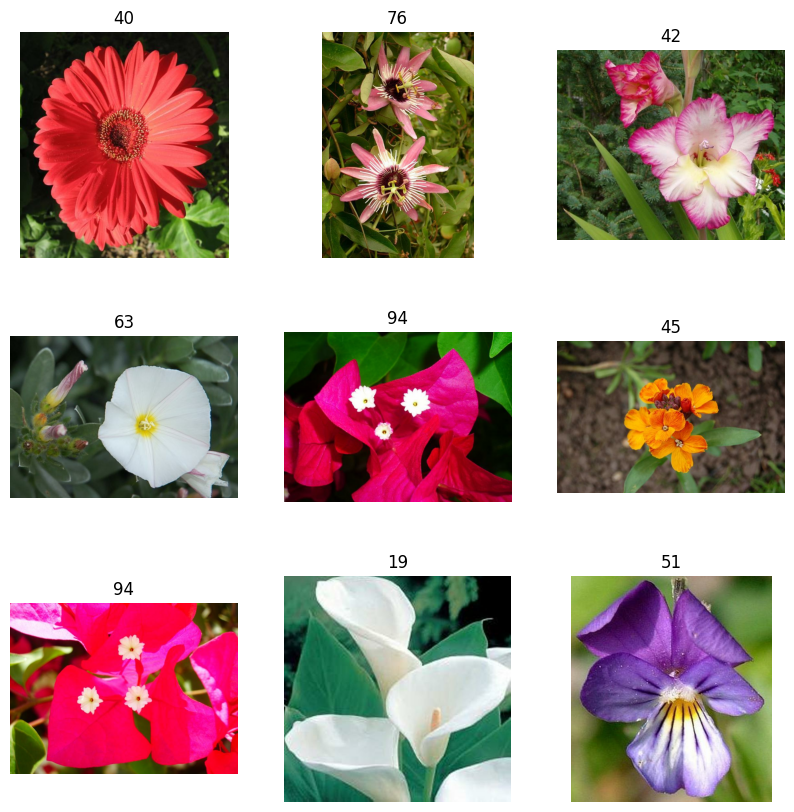

In [108]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis('off')

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Preprocessing</h2>
    <p>
        Data Augmentation of resizing, cropping, flipping, adjusting brightness, and adjusting contrast was added to images in order to prevent overfitting and introduce variability
    </p>
    <p>
        The map function applies the augmentation to each image
    </p>
    <p>
        The batching is done before the model to improve performance
    </p>
</div>



In [109]:
def augment(image, label):
    image.set_shape([None, None, 3])
    image = tf.image.resize(image, (256, 256))
    image = tf.image.random_crop(image, size=[224, 224, 3])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    return image, label

# Apply the augmentation function to each image in the dataset
train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

# Batch the datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Build the CNN Model</h2>
    <p>
        We created a CNN model that used the Sequential API from Tensorflow's Keras. This is simply a feed-forward Neural Network where each layer has a one-to-one relationships (one input tensor is correlated to one output tensor).
    </p>
    <p>
        Layers:
        <ul>
            <li>Input: The input shape is 224 x 224 on 3 channels of RGB
            <li>Convolutional: The first parameter is the number of filters that will be used and the second parameter is the dimensions of those filters. In the model we have 3 layers that have 32, 64, and 128 filters that all are defined 
            <li>Pooling: Always follows a Convolutional layer. This reduces the dimensions by a factor of 2
            <li>Flatten: Coverts the matrix into a 1D vector so that it can be fed into the dense layers.
            <li>Dense: Fully connected layers of neurons to make decisions. The last one is 102 neurons for the 102 classifications.
    </p>
</div>



In [120]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(102, activation='softmax')  # 102 classes for 102 flower types
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <p>
        Train our model <i>(if the model has already been trained, we will just load the trained model)</i>.
    </p>
</div>

In [121]:
# cnn.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 141s 722ms/step - accuracy: 0.0309 - loss: 56.1115 - val_accuracy: 0.0186 - val_loss: 4.9349
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 134s 692ms/step - accuracy: 0.0485 - loss: 4.4196 - val_accuracy: 0.0098 - val_loss: 4.8224
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 135s 698ms/step - accuracy: 0.0451 - loss: 4.3745 - val_accuracy: 0.0206 - val_loss: 4.7891
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 134s 696ms/step - accuracy: 0.0550 - loss: 4.3365 - val_accuracy: 0.0245 - val_loss: 4.7352
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 135s 699ms/step - accuracy: 0.0561 - loss: 4.3038 - val_accuracy: 0.0216 - val_loss: 4.7694
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 127s 658ms/step - accuracy: 0.0586 - loss: 4.3371 - val_accuracy: 0.0157 - val_loss: 4.9207
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 126s 653ms/step - accuracy: 0.0510 - loss: 4.3556 - val_accuracy: 0.0265 - val_loss: 4.7789
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 127s 658ms/step - accuracy: 0.0726 

In [123]:
# cnn.save('CNN.keras')

In [124]:
cnn_loaded = tf.keras.models.load_model('CNN.keras')

In [125]:
test_loss, test_accuracy = cnn_loaded.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.0681 - loss: 6.7025
Test Loss: 6.449373245239258
Test Accuracy: 0.06960784643888474


<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Transfer Learning</h2>
    <p>
        Our CNN model scored incredibly poorly using accuracy and loss as our evaluation metrics. The likely reasoning for this is that our dataset consisted of around 6,000 images. CNN's are known to be exceptionally data hungry, especially for complex problems such as classifying flowers,  dataset of about 6,000 images is likely not sufficient for 102 classes of flowers. Flowers have high intra-class variations and subtle inter-class differences, which makes classifying them very difficult for a CNN. A CNN would need an exceptionally large dataset to train off of in order to successfully classify flowers.
    </p>
    <p>
        With that in mind, we needed to turn to other sources in order to successfully perform our classification. To do that we decided to use Transfer Learning. Our new model would use the ResNet50, which is a CNN that is particularly great for image classification, as our base layer along with a pooling layer, dropout layer, and some dense layers in order to train the model specifically for our flower identification problem.
    </p>
</div>



In [110]:
# Load a pre-trained model without the top layer using the Functional API
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create the input layer
inputs = layers.Input(shape=(224, 224, 3))

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add custom top layers
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Regularization to prevent overfitting
outputs = layers.Dense(102, activation='softmax')(x)  # 102 flower classes

# Create the new model
model = models.Model(inputs, outputs)

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <p>
        Train our model <i>(if the model has already been trained, we will just load the trained model)</i>.
    </p>
</div>



In [111]:
# model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.0962 - loss: 4.5668 - val_accuracy: 0.3010 - val_loss: 3.1968
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.4201 - loss: 2.6022 - val_accuracy: 0.5363 - val_loss: 2.0641
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.5918 - loss: 1.7189 - val_accuracy: 0.6951 - val_loss: 1.4076
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.6905 - loss: 1.2801 - val_accuracy: 0.7598 - val_loss: 1.0690
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.7593 - loss: 1.0083 - val_accuracy: 0.8088 - val_loss: 0.8562
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.7960 - loss: 0.8202 - val_accuracy: 0.8422 - val_loss: 0.7241
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8211 - loss: 0.7076 - val_accuracy: 0.8569 - val_loss: 0.6433
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.8371 - loss: 0.6383 - val_accu

In [112]:
# model.save('TransferLearningModel.keras')

In [122]:
TransferLearning = tf.keras.models.load_model('TransferLearningModel.keras')

c:\Users\tplay\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 434 variables whereas the saved optimizer has 10 variables. 
  


In [115]:
test_loss, test_accuracy = TransferLearning.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8693 - loss: 0.5610
Test Loss: 0.5407591462135315
Test Accuracy: 0.8745098114013672


<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Test the CNN Model</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Analysis</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Conclusion</h2>
    <p>
        ...
    </p>
</div>

